# AE 240 Assignement- Launch Vehicle Trajectory Code

In [115]:
from __future__ import print_function
from numpy import *
import pandas as pd

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
q=0.001921
g0=9.81


def g_h(h): # value of g at an altitude h
    factor=( 6371.0/(h+6371.0) )**2
    return g0*factor

def beta(m_i, m_f, t): #burn rate for the vertical launch (Assumed Constant)
    return (m_i-m_f)/t

In [118]:
#Functions for parameters in a constant pitch rate trajectory

def TOF(theta_a, theta_b): #Time of flight to go from angle A to B in constant pitch trajectory
    return (theta_a-theta_b)/q

def theta_final(theta_initial, TOF ): #Final angle for a given initial angle and TOF
    return q*TOF+theta_initial

def velocity1(theta, g):
    return g*sin(theta)/q

def altitude_constant_q(theta_i, theta_f, g, h0):
    return ( g*(cos(2*theta_i)-cos(2*theta_f))/(4*q*q) +h0 )

In [119]:
#Functions for parameters in a vertical launch

def vel_ideal(m_i,m_f,Isp): #Ideal Velocity without the impact of gravity
    return g0*Isp*log(m_i/m_f)

def vel_gravity(m_i, m_f, Isp, g, t): #Velocity taking into account gravity
    return (vel_ideal(m_i,m_f,Isp) - g*t)
 
def altitude_vertial_launch(m_i, m_f, Isp, g, t): #Altitude attained by the vertical launch
    L = (m_f-m_i)/m_i
    b=beta(m_i,m_f,t)
    H = ( (m_i*g0*Isp)/b)*((1-L)*log(1-L) + L) -0.5*g*t*t
    return H

## Stage 1

In [120]:
#These data have been mentioned in the report and have been obtained from http://www.astronautix.com/c/castor4.html

m01 = 190000
m11 = 106615
Tb1 = 54
Isp1= 261

In [121]:
t1 = 10
t2 = Tb1-t1

###### For a certain time t1, the Launch vehicle undergoes vertical motion. After that, it receives a pitch kick of theta0, and executes a constant pitch rate gravity turn till angle theta1 in the 1st stage

In [133]:
#Calculations for the vertical launch
m = 130327.8497

V0 = vel_gravity(m01, m, Isp1, g0, t1)
H0 = altitude_vertial_launch(m01, m, Isp1, g0, t1)
g01 = g_h(H0/1000.0)
g=(g01+g0)/2.0
V0 = vel_gravity(m01, m, Isp1, g, t1)
H0 = altitude_vertial_launch(m01, m, Isp1, g, t1)
beta0 = beta(m01, m, t1)
print("H0: ", H0)
print("V0: ", V0)
print("Burn rate for the vertical launch: ",beta0, "kg/s")

H0:  3165.26640262
V0:  867.148698105
Burn rate for the vertical launch:  5967.21503 kg/s


In [134]:
#Calculations from time t1 to time Tb

theta0=arcsin(V0*q/g0)
theta1=theta_final(theta0, Tb1)
altitude1=altitude_constant_q(theta0, theta1, g0, H0)
g01 = g_h(altitude1)
g1=(g0+g01)/2.0
altitude1=altitude_constant_q(theta0, theta1, g1, 0)

V1=velocity1(theta1,g1)

beta1 =beta(m, m11, t2)

print("Pitch kick at the start: ", theta0*180/pi)
print("Altitude at stage 1 separation: ", altitude1/1000, "km")
print("Theta at stage 1 separation: ", theta1*180/pi, "degrees")
print("Velocity at stage 1 separation: ", V1/1000, "km/s")
print("Burn rate after vertical launch to stage 1 separation: ",beta1, "kg/s")

Pitch kick at the start:  9.77651472565
Altitude at stage 1 separation:  29.8769284886 km
Theta at stage 1 separation:  15.7200351177 degrees
Velocity at stage 1 separation:  0.697734586421 km/s
Burn rate after vertical launch to stage 1 separation:  538.928402273 kg/s


## Stage 2

In [135]:
#These data have been mentioned in the report and have been obtained from http://www.astronautix.com/d/deltathorrs27.html
Tb2 = 223
Isp2 = 296
m12 = 95194
m22 = 15186

In [136]:
#Calulculations from stage 1 separation to stage 2 separation

#pitch kick of 5 degrees at the start of this stage
theta1+=0.0872664
theta2=theta_final(theta1, Tb2)

altitude2=altitude_constant_q(theta1, theta2, g1, altitude1)
g12=g_h((altitude1+altitude2)/1000.0)
g2=(g12+g1)/2.0
altitude2=altitude_constant_q(theta1, theta2, g2, altitude1)

V2=velocity1(theta2,g0)

beta2 = beta(m12, m22, Tb2)

print("Altitude at stage 2 separation: ", altitude2/1000, "km")
print("Theta at stage 2 separation: ", theta2*180/pi, "degrees")
print("Velocity at stage 2 separation: ", V2/1000, "km/s")
print("Burn rate from stage 1 separation to stage 2 separation: ",beta2, "kg/s")

Altitude at stage 2 separation:  386.079479528 km
Theta at stage 2 separation:  45.2645694461 degrees
Velocity at stage 2 separation:  3.62762857794 km/s
Burn rate from stage 1 separation to stage 2 separation:  358 kg/s


## Stage 3

In [137]:
#These data have been mentioned in the report and have been obtained from http://www.astronautix.com/d/deltap.html

Tb3 = 322
Isp3 = 301
m13 = 10826
m23 = 6306

In [138]:
#Calculations from stage 2 separation to stage 3 separation

theta3 = theta_final(theta2, Tb3)
theta3+=0.17453

altitude3=altitude_constant_q(theta2, theta3, g2, altitude2)
g13=g_h((altitude3+altitude2)/1000.0)
g3=(g+g2)/2.0
altitude3=altitude_constant_q(theta2, theta3, g3, altitude2)

V3 = velocity1(theta3, g0)

beta3 = beta(m13, m23, Tb3)

print("Altitude at stage 3 separation: ", altitude3/1000, "km")
print("Theta at stage 3 separation: ", theta3*180/pi, "degrees")
print("Velocity at stage 3 separation: ", V3/1000, "km/s")
print("Burn rate from stage 2 separation to stage 3 separation: ",beta3, "kg/s")

Altitude at stage 3 separation:  947.491994488 km
Theta at stage 3 separation:  90.7053938117 degrees
Velocity at stage 3 separation:  5.10632824069 km/s
Burn rate from stage 2 separation to stage 3 separation:  14 kg/s


## Error in the final parameters obtained

In [139]:
theta = pi/2 #Since final theta of the trajectory is 90 degrees
altitude = 1000000 # Launch vehicle trajectory is assumed circular with the given altitude as 1000 km 

In [140]:
error_theta = 100*(theta-theta3)/theta
error_altitude = 100*(altitude-altitude3)/altitude

print("Error in theta: ", error_theta, "%")
print("Error in altitude: ", error_altitude, "%")

Error in theta:  -0.783770901896 %
Error in altitude:  5.25080055115 %


## Graphs and Plots

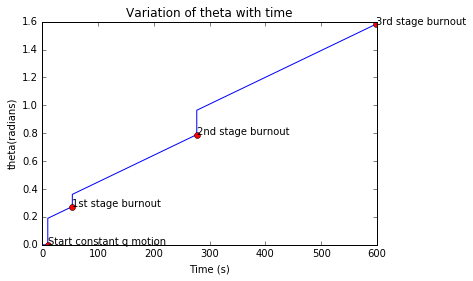

In [141]:
#Plotting theta as a function of time
theta_values=[]
time_values=[]

#stage 1
time1=linspace(0,10,10)
theta_list_1=repeat(0,10)
time2=linspace(10, 54, 44)
theta_list_2=time2*q+0.1705

#stage 2
time3=linspace(54, 277, 223)
theta_list_3=(time3-54)*q+theta_list_2[-1]+0.0872664

#stage 3
time4=linspace(277, 599, 322)
theta_list_4=(time4-277)*q+theta_list_3[-1]+0.17453

time_values = concatenate((time1,time2,time3, time4), axis=0)
theta_values = concatenate((theta_list_1,theta_list_2,theta_list_3, theta_list_4), axis=0)

plt.plot(time_values, theta_values)
plt.title("Variation of theta with time")
plt.xlabel("Time (s)")
plt.ylabel("theta(radians)")
plt.annotate("Start constant q motion", xy=(time1[-1], theta_list_1[-1]))
plt.annotate("1st stage burnout", xy=(time2[-1], theta_list_2[-1]))
plt.annotate("2nd stage burnout", xy=(time3[-1], theta_list_3[-1]))
plt.annotate("3rd stage burnout", xy=(time4[-1], theta_list_4[-1]))
plt.plot(time1[-1], theta_list_1[-1], 'ro')
plt.plot(time2[-1], theta_list_2[-1], 'ro')
plt.plot(time3[-1], theta_list_3[-1], 'ro')
plt.plot(time4[-1], theta_list_4[-1], 'ro')
plt.savefig("theta.png")

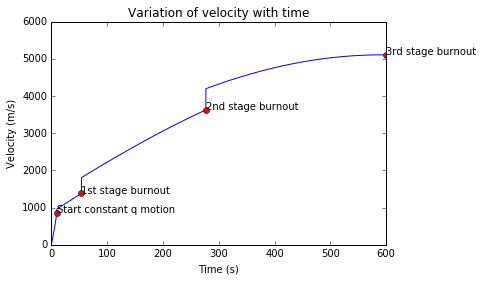

In [144]:
#Plotting velocity as a function of time
velocity_values=[]
time_values=[]

#stage 1
time1=linspace(0,10,10)
velocity_list_1=vel_gravity(m01, m01-beta0*time1, Isp1, g, time1)
time2=linspace(10, 54, 44)
velocity_list_2=velocity1(theta_list_2,g0)

#stage 2
time3=linspace(54, 277, 223)
velocity_list_3=velocity1(theta_list_3,g0)

#stage 3
time4=linspace(277, 599, 322)
append(time4, array([599]))
velocity_list_4=velocity1(theta_list_4,g0)
append(velocity_list_4, array([7273.6]))

time_values = concatenate((time1,time2,time3, time4) , axis=0)
velocity_values = concatenate((velocity_list_1,velocity_list_2,velocity_list_3, velocity_list_4), axis=0)

plt.plot(time_values, velocity_values)
plt.title("Variation of velocity with time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.annotate("Start constant q motion", xy=(time1[-1], velocity_list_1[-1]))
plt.annotate("1st stage burnout", xy=(time2[-1], velocity_list_2[-1]))
plt.annotate("2nd stage burnout", xy=(time3[-1], velocity_list_3[-1]))
plt.annotate("3rd stage burnout", xy=(time4[-1], velocity_list_4[-1]))
#plt.annotate("Final velocity after manoeuvre", xy=(time4[-1], 7273.6))
plt.plot(time1[-1], velocity_list_1[-1], 'ro')
plt.plot(time2[-1], velocity_list_2[-1], 'ro')
plt.plot(time3[-1], velocity_list_3[-1], 'ro')
plt.plot(time4[-1], velocity_list_4[-1], 'ro')
plt.savefig("Velocity.png")

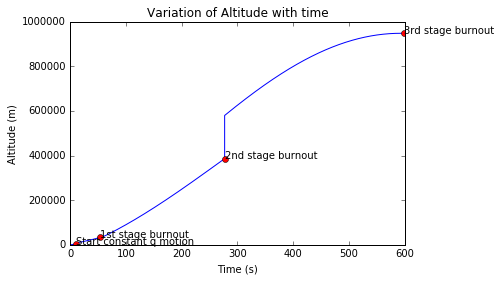

In [145]:
#Plotting height as a function of time
alt_values=[]
time_values=[]

#stage 1
time1=linspace(1e-1,10,10)
alt_list_1=altitude_vertial_launch(m01, m, Isp1, g0, time1)
time2=linspace(10, 54, 44)
alt_list_2=altitude_constant_q(theta0, theta_list_2, g1, H0)

#stage 2
time3=linspace(54, 277, 223)
alt_list_3=altitude_constant_q(theta1, theta_list_3, g2, altitude1)

#stage 3
time4=linspace(277, 599, 322)
alt_list_4=altitude_constant_q(theta2, theta_list_4, g3, altitude2)

time_values = concatenate((time1,time2,time3, time4) , axis=0)
alt_values = concatenate((alt_list_1,alt_list_2,alt_list_3, alt_list_4), axis=0)

plt.plot(time_values, alt_values)
plt.title("Variation of Altitude with time")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")

plt.annotate("Start constant q motion", xy=(time1[-1], alt_list_1[-1]))
plt.annotate("1st stage burnout", xy=(time2[-1], alt_list_2[-1]))
plt.annotate("2nd stage burnout", xy=(time3[-1], alt_list_3[-1]))
plt.annotate("3rd stage burnout", xy=(time4[-1], alt_list_4[-1]))
plt.plot(time1[-1], alt_list_1[-1], 'ro')
plt.plot(time2[-1], alt_list_2[-1], 'ro')
plt.plot(time3[-1], alt_list_3[-1], 'ro')
plt.plot(time4[-1], alt_list_4[-1], 'ro')
plt.savefig("altitude.png")